<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
The [Istio Leadership Dataset](https://github.com/geekygirldawn/k8s_data/datasets) and the analysis in this notebook were created by [Dawn Foster](https://fastwonderblog.com/) and are licensed under the [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

# Summary of Istio Leadership Positions

Overall, Google employees hold just under 50% of Istio leadership positions. IBM employees come in at number 2 with less than 20% of significant leadership positions (SC, TOC, WG Lead) and just over 10% of all leadership positions. No other company has employees with more than 10% of leadership positions.

![Graph of all leaders by company](istio_graphs_2022-04-22/all_leaders.png)

![Graph of top leaders by company](istio_graphs_2022-04-22/top_leaders.png)

This notebook contains data structures that allow you to further explore the data and see exactly how these charts were created and how the data was analyzed.

### Dataset Summary
* The source of this data is the Istio [teams.yaml](https://github.com/istio/community/commits/master/org/teams.yaml) file. 
* The leadership roles were read from the yaml file and stored in the [owners_data_istio_2022-04-22.csv](owners_data_istio_2022-04-22.csv) file. Release teams for specific releases were excluded.
* [CNCF Affiliation](https://github.com/cncf/gitdm) data was used as a starting point to populate company information. The GitHub REST API was used to get company information from the user profile to fill in missing data if available.
* There are 280 leadership roles, 100 users, 18 companies, and 7 people with 'Unknown' affiliations.
* There is quite a bit of duplication when just looking at roles, since there are "Maintainer" roles, "WG Maintainer", and WG subteams, and many people hold multiple positions.


In [2]:
import pandas as pd

# Read CSV skipping the 5 rows with dataset license info
istioDF = pd.read_csv('owners_data_istio_2022-04-22.csv', skiprows=5)

# Data Cleanup

# Remove some accounts that aren't people
istioDF.drop(istioDF[istioDF.username.str.startswith('istio')].index, inplace=True)

# Map companies to remove duplicates, and map everything that isn't an org into a single 'Unknown' category
istioDF.company = istioDF.company.replace({'Google': 'Google LLC', 
                                  'IBM Corp': 'International Business Machines Corporation',
                                  'Independent' : 'Unknown',
                                  '@tetrateio' : 'Tetrate.io',
                                  'Istio' : 'Unknown',
                                  '@Alibaba @kubernetes @istio  @servicemesher' : 'Alibaba',
                                  '@Stripe' : 'Stripe',
                                  '@Tencent' : 'Tencent',
                                  'NotFound' : 'Unknown'})

istioDF

,company,username,team
0,Google LLC,adammil2000,Maintainers
1,Google LLC,andraxylia,Maintainers
2,Google LLC,bianpengyuan,Maintainers
3,Red Hat Inc.,brian-avery,Maintainers
4,International Business Machines Corporation,clyang82,Maintainers
...,...,...,...
278,Tetrate.io,liamawhite,WG - User Experience Maintainers
279,Google LLC,nmittler,WG - User Experience Maintainers
280,VMware Inc.,shamsher31,WG - User Experience Maintainers
281,Google LLC,therealmitchconnors,WG - User Experience Maintainers


## Data by GitHub username

In [3]:
import numpy as np
from collections import Counter

# Get an array of unique GitHub usernames
users = istioDF['username'].unique()
print('These', len(users), 'users hold one or more leadership positions:')
print(users)

# Use a dictionary to map company affiliation to each unique username
user_dict = {}
for x in istioDF.iterrows():
    username = x[1].username
    company = x[1].company
    user_dict[username] = company

company_list = list(user_dict.values())
company_agg = Counter(company_list).most_common()
print("\nThey work at these", len(company_agg)-1, "companies:")
company_agg

These 100 users hold one or more leadership positions:
['adammil2000' 'andraxylia' 'bianpengyuan' 'brian-avery' 'clyang82'
 'costinm' 'dgn' 'diemtvu' 'douglas-reid' 'duderino' 'elfinhe' 'ericvn'
 'esnible' 'fejta' 'fleeto' 'fpesce' 'frankbu' 'gargnupur' 'gbaufake'
 'GregHanson' 'hanxiaop' 'howardjohn' 'hzxuzhonghu' 'incfly' 'irisdingbj'
 'jacob-delgado' 'jasonwzm' 'JimmyCYJ' 'john-a-joyce' 'johnma14'
 'jwendell' 'kebe7jun' 'kyessenov' 'lambdai' 'liamawhite' 'liminw'
 'linsun' 'lizan' 'loverto' 'mandarjog' 'morvencao' 'myidpt' 'Nino-K'
 'nmittler' 'nrjpoddar' 'ostromart' 'ramaraochavali' 'rcaballeromx'
 'rcernich' 'richardwxn' 'rlenglet' 'rootsongjc' 'rshriram' 'SataQiu'
 'sbezverk' 'sdake' 'shamsher31' 'stewartbutler' 'suryadu'
 'therealmitchconnors' 'tiswanso' 'venilnoronha' 'Xunzhuo' 'yangminzhu'
 'yxue' 'zhlsunshine' 'Mythra' 'ameer00' 'angaluri' 'CloudJason'
 'craigbox' 'louiscryan' 'thisisnotapril' 'ZackButcher' 'smawson'
 'jasminejaksic' 'Monkeyanator' 'stevenctl' 'dcberg' 'jduma

[('Google LLC', 48),
 ('International Business Machines Corporation', 11),
 ('Unknown', 7),
 ('Red Hat Inc.', 6),
 ('Solo.io', 5),
 ('Tetrate.io', 5),
 ('Huawei Technologies Co. Ltd', 3),
 ('Cisco', 3),
 ('VMware Inc.', 2),
 ('Aspen Mesh', 1),
 ('DaoCloud Network Technology Co. Ltd.', 1),
 ('Beijing Enterprises Sanxing', 1),
 ('SUSE', 1),
 ('Salesforce.com inc.', 1),
 ('Alibaba', 1),
 ('Tencent', 1),
 ('Intel Corporation', 1),
 ('Stripe', 1),
 ('Apple Inc.', 1)]

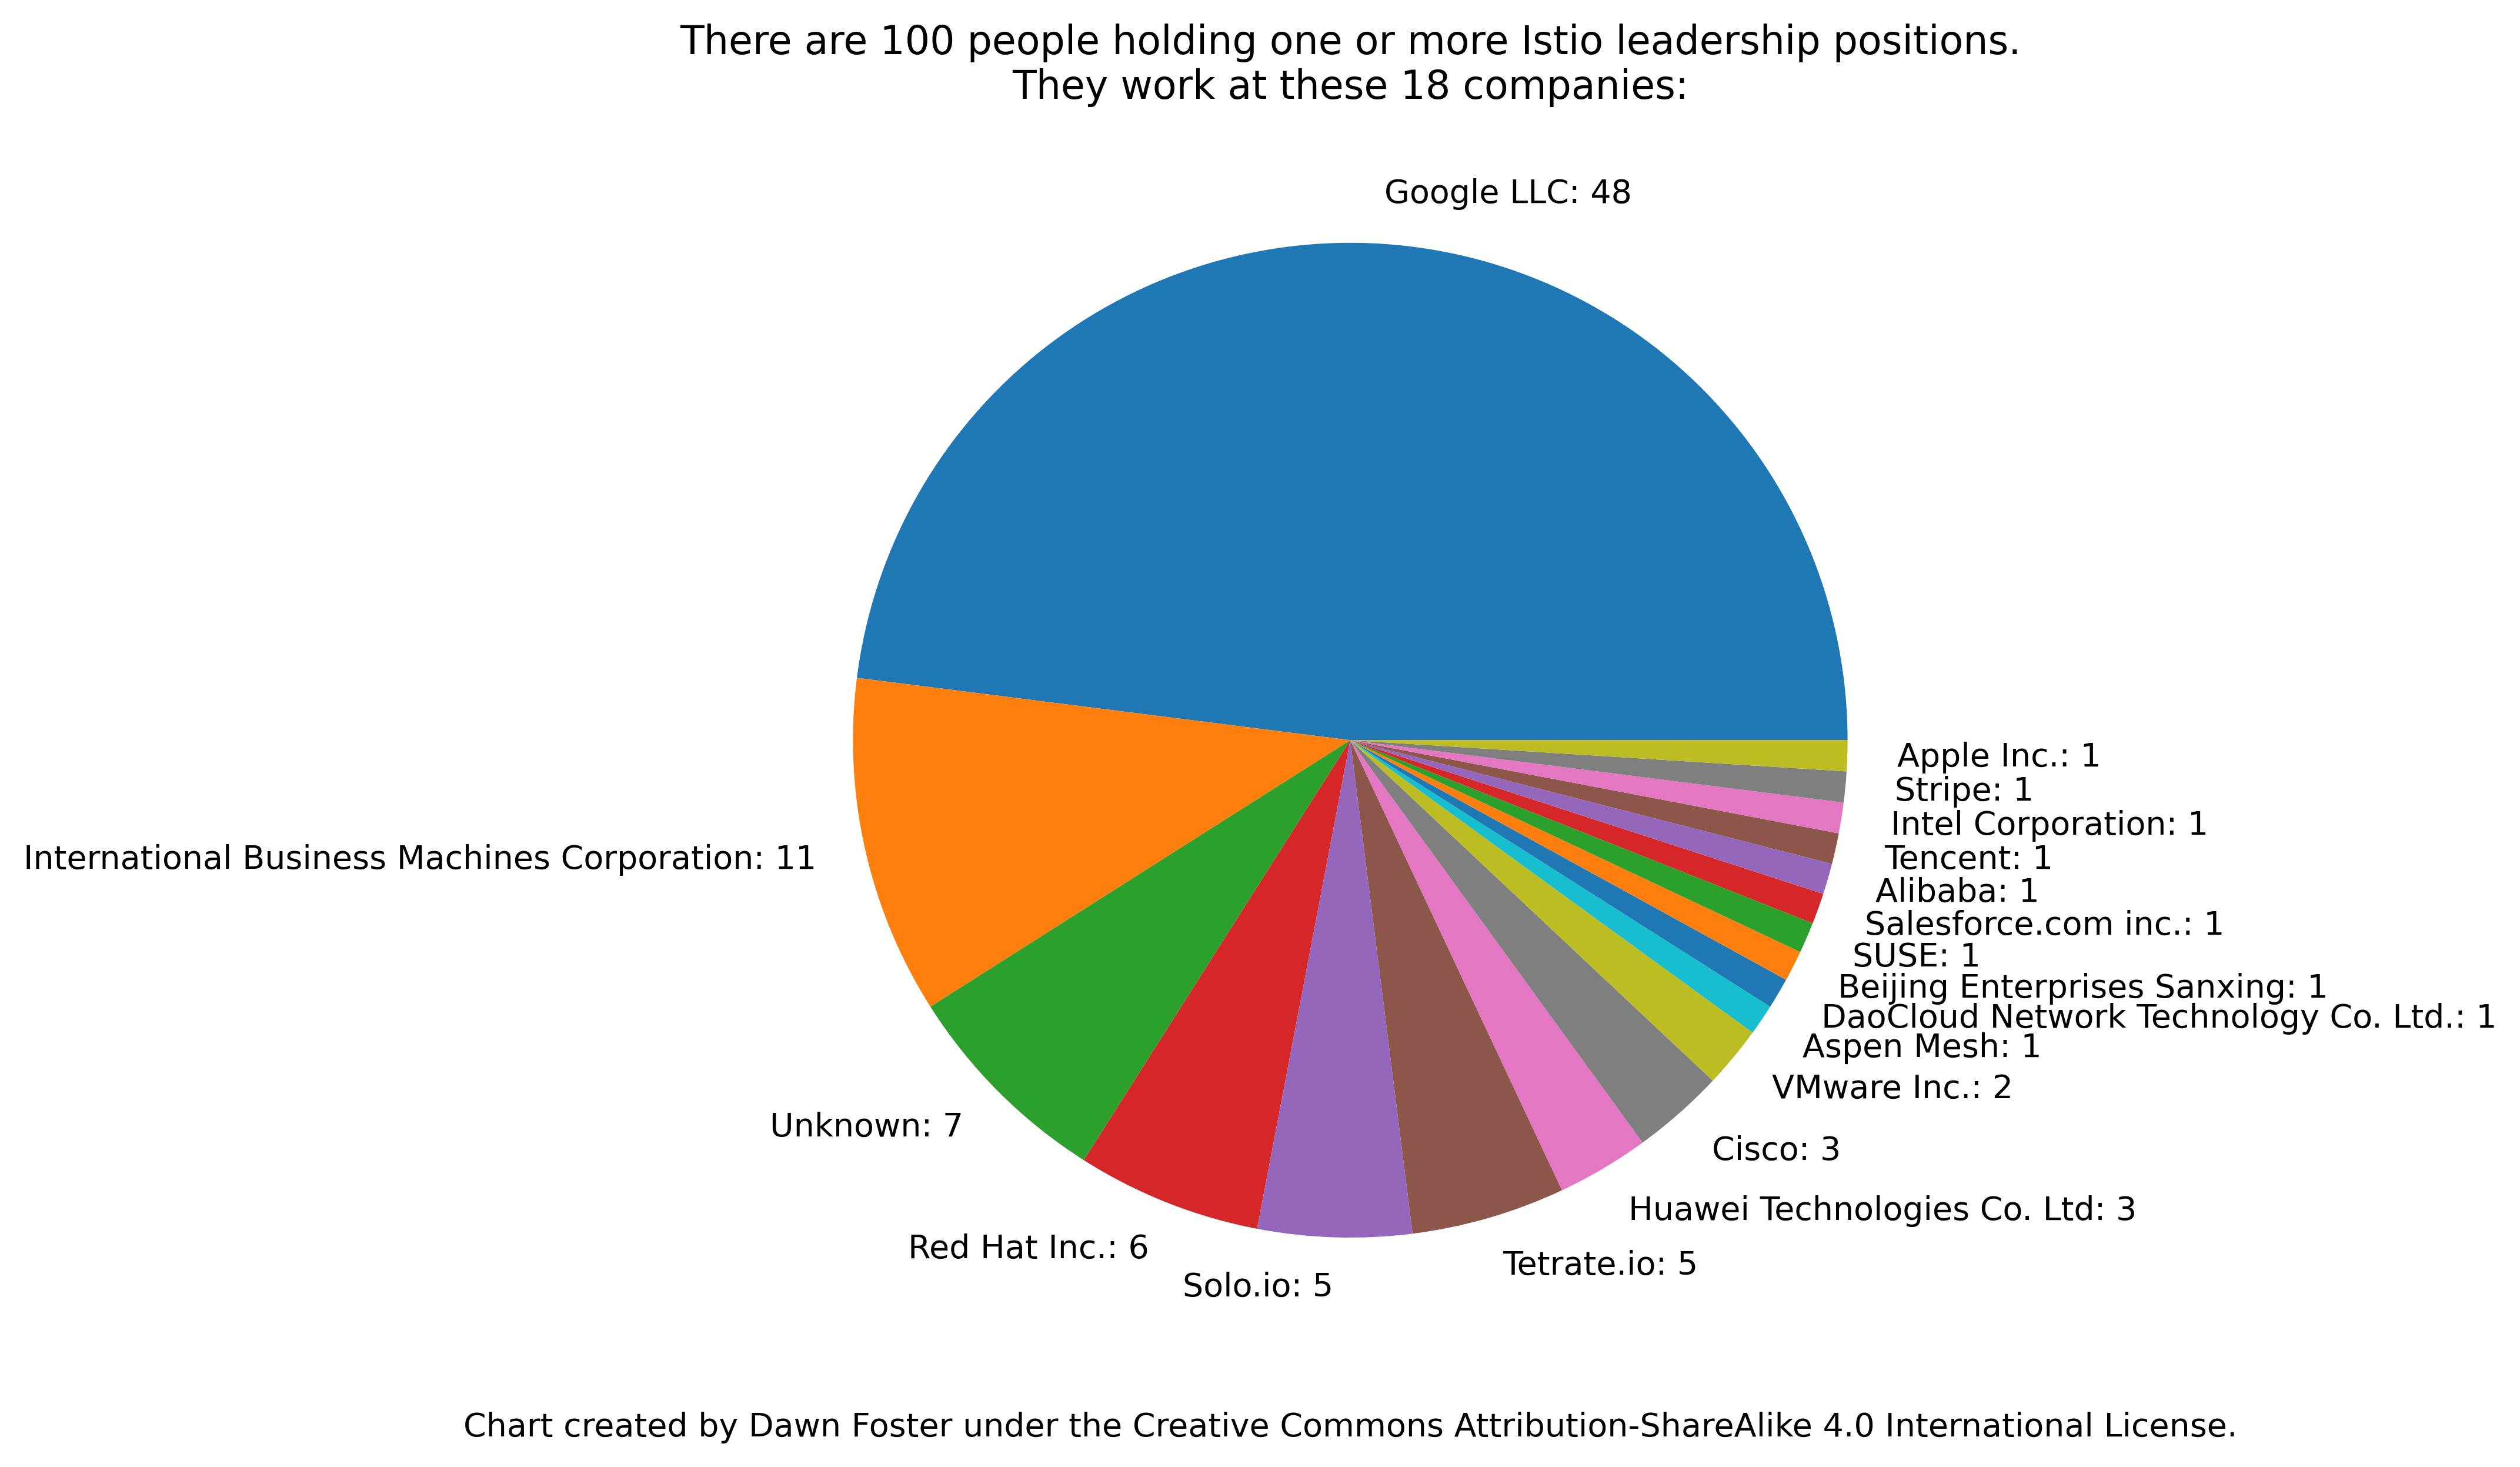

In [6]:
# Generate a pie chart from the above data
from matplotlib import pyplot as plt

data = [x[1] for x in company_agg]
labels = [str(str(x[0]) + ': ' + str(x[1])) for x in company_agg]

fig = plt.figure(figsize =(12, 7), dpi=400)
title_str = 'There are ' + str(len(users)) + ' people holding one or more Istio leadership positions.\nThey work at these ' + str(len(company_agg)-1) + " companies:"
plt.title(title_str)

plt.xlabel('\nChart created by Dawn Foster under the Creative Commons Attribution-ShareAlike 4.0 International License.')

plt.pie(data, labels = labels)
plt.show()
fig.savefig('istio_graphs_2022-04-22/all_leaders.png', dpi=fig.dpi)

## Most Significant Leadership Positions by Username

Looks at just the people holding positions on the Steering Committee, Technical Oversight Committee (TOC), and Working Group (WG) Lead positions.

In [8]:
top_leadersDF = istioDF.loc[(istioDF['team'] == 'Steering Committee') | 
                            (istioDF['team'] == 'Technical Oversight Committee') |
                            (istioDF['team'] == 'Working Group Leads')]
top_leadersDF

,company,username,team
85,Google LLC,ameer00,Steering Committee
86,Unknown,angaluri,Steering Committee
87,International Business Machines Corporation,CloudJason,Steering Committee
88,Google LLC,craigbox,Steering Committee
89,Huawei Technologies Co. Ltd,hzxuzhonghu,Steering Committee
90,International Business Machines Corporation,irisdingbj,Steering Committee
91,DaoCloud Network Technology Co. Ltd.,kebe7jun,Steering Committee
92,Solo.io,linsun,Steering Committee
93,Google LLC,louiscryan,Steering Committee
94,Red Hat Inc.,rcernich,Steering Committee


In [9]:
# Get an array of unique GitHub usernames
top_users = top_leadersDF['username'].unique()
print('These', len(top_users), 'users hold one or more significant leadership positions:')
print(top_users)

# Use a dictionary to map company affiliation to each unique username
top_user_dict = {}
for x in top_leadersDF.iterrows():
    username = x[1].username
    company = x[1].company
    top_user_dict[username] = company

top_company_list = list(top_user_dict.values())
top_company_agg = Counter(top_company_list).most_common()
print("\nThey work at these", len(top_company_agg), "companies:")
top_company_agg

These 26 users hold one or more significant leadership positions:
['ameer00' 'angaluri' 'CloudJason' 'craigbox' 'hzxuzhonghu' 'irisdingbj'
 'kebe7jun' 'linsun' 'louiscryan' 'rcernich' 'thisisnotapril'
 'ZackButcher' 'ericvn' 'howardjohn' 'nrjpoddar' 'smawson' 'douglas-reid'
 'esnible' 'frankbu' 'jacob-delgado' 'liminw' 'lizan' 'mandarjog'
 'Monkeyanator' 'myidpt' 'stevenctl']

They work at these 9 companies:


[('Google LLC', 12),
 ('International Business Machines Corporation', 5),
 ('Solo.io', 2),
 ('Tetrate.io', 2),
 ('Unknown', 1),
 ('Huawei Technologies Co. Ltd', 1),
 ('DaoCloud Network Technology Co. Ltd.', 1),
 ('Red Hat Inc.', 1),
 ('Aspen Mesh', 1)]

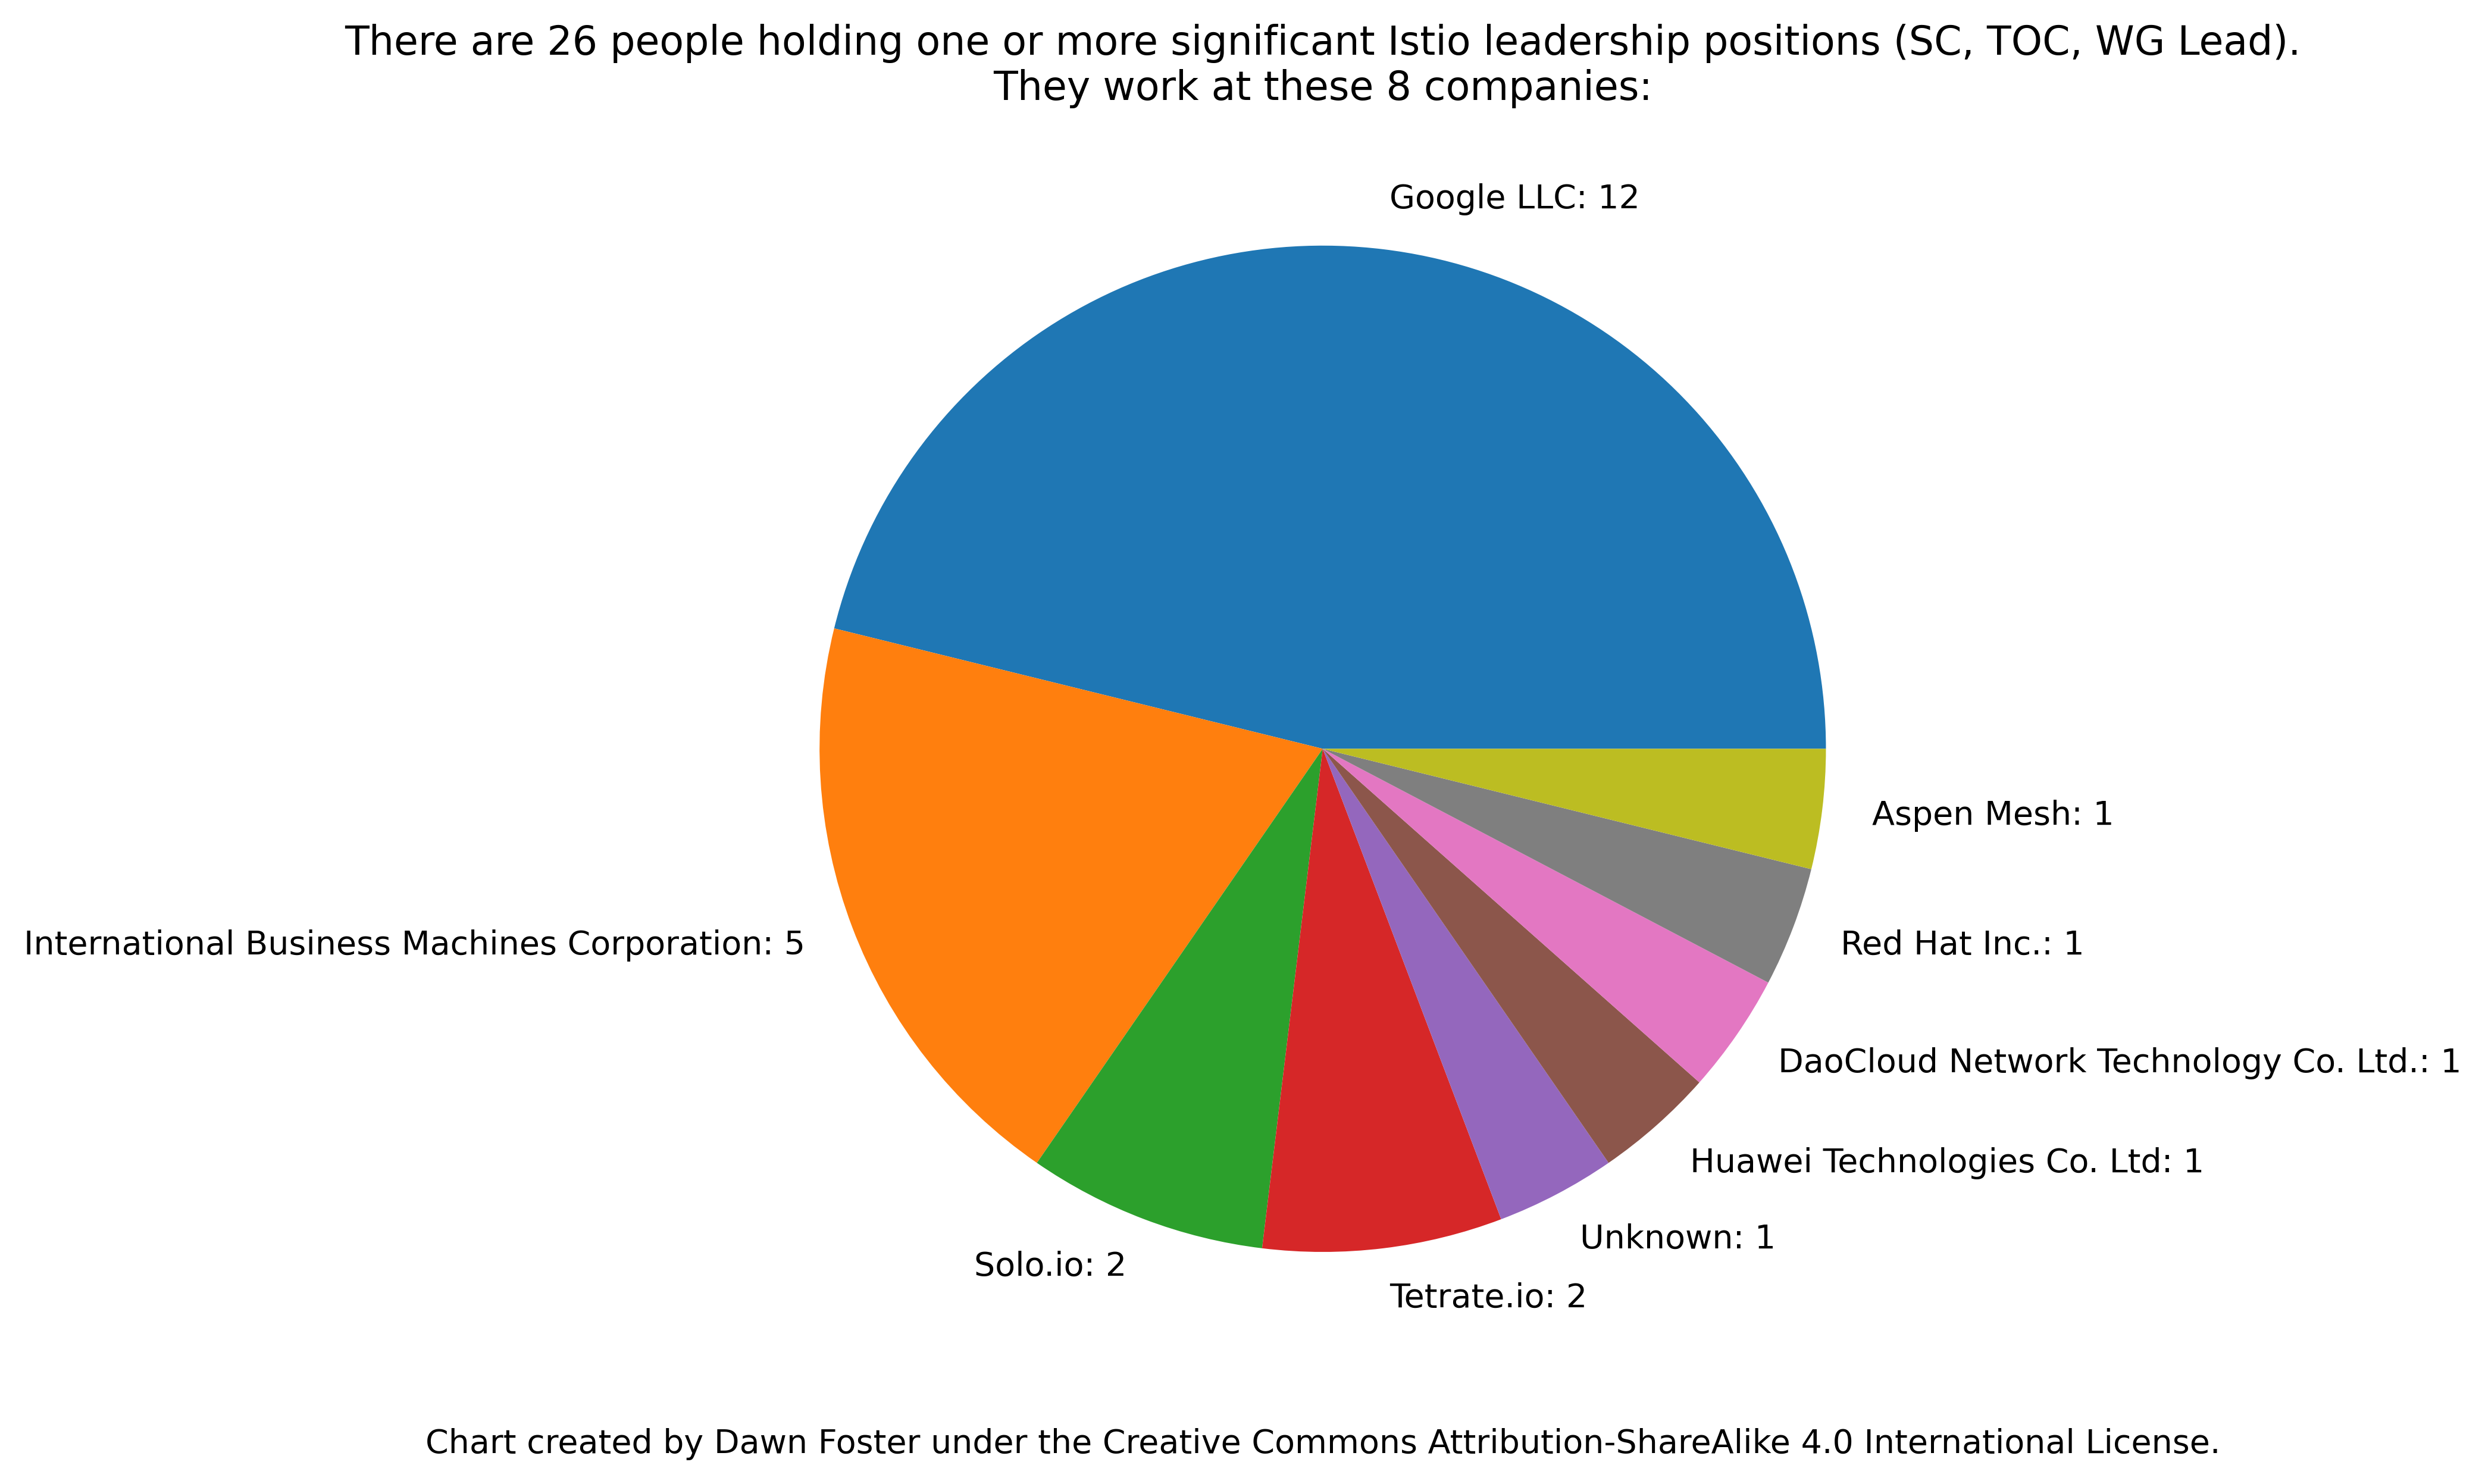

In [10]:
# Generate a pie chart from the above data about significant leadership positions
data = [x[1] for x in top_company_agg]
labels = [str(str(x[0]) + ': ' + str(x[1])) for x in top_company_agg]

fig = plt.figure(figsize =(12, 7), dpi=400)
title_str = 'There are ' + str(len(top_users)) + ' people holding one or more significant Istio leadership positions (SC, TOC, WG Lead).\nThey work at these ' + str(len(top_company_agg)-1) + " companies:"
plt.title(title_str)

plt.xlabel('\nChart created by Dawn Foster under the Creative Commons Attribution-ShareAlike 4.0 International License.')

plt.pie(data, labels = labels)
plt.show()
fig.savefig('istio_graphs_2022-04-22/top_leaders.png', dpi=fig.dpi)

## All Leadership Roles by Company
**Note: includes duplicates as many people hold multiple roles**

In [11]:
all_companies = istioDF.value_counts('company')
print("There are", len(istioDF), "leadership roles (including some duplication) held by people working at these companies:")
print(all_companies)

There are 280 leadership roles (including some duplication) held by people working at these companies:
company
Google LLC                                     135
International Business Machines Corporation     36
Solo.io                                         23
Red Hat Inc.                                    17
Tetrate.io                                      15
Unknown                                          9
Huawei Technologies Co. Ltd                      8
Cisco                                            6
Aspen Mesh                                       5
VMware Inc.                                      5
DaoCloud Network Technology Co. Ltd.             4
Salesforce.com inc.                              3
Beijing Enterprises Sanxing                      3
Alibaba                                          3
Intel Corporation                                2
SUSE                                             2
Tencent                                          2
Stripe                